 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 9. CNN Basis**
# Section 2. 패딩과 스트라이드

### _Objective_
1. 합성곱 연산 전후 특징맵의 크기를 보존해주는 패딩에 대해 배워보도록 하겠습니다.<br>
2. 합성곱 연산량을 줄여주는 스트라이드(Stride)에 대해 배워보도록 하겠습니다.
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<br><br>



# \[ 1. 패딩이란 \]

----

----

> *합성곱 연산을 거치게 되면, 특징맵의 크기는 약간씩 줄게 됩니다.*<br>
> *패딩은 합성곱 연산을 거치더라도, 특징맵의 크기가 줄어들지 않도록 만듭니다.*<br>


<br>


## 1. 합성곱 연산의 문제점 : 크기의 축소
----

합성곱 연산을 적용할 경우, 특징맵의 가장자리 부분은 연산에서 제외되기 때문에<br>
약간씩 줄어들게 됩니다.

In [1]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10

print("Before Feature Map size :",image.shape)

# sobel Filter를 이용
v_sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) 

# 합성곱 연산 적용
result = #fix me#
for i in range(#fix me #):
    for j in range(#fix me#):
        patch = #fix me #
        value = #fix me#
        result[#fix me#] = value

print("After Feature Map size :",result.shape)

SyntaxError: ignored

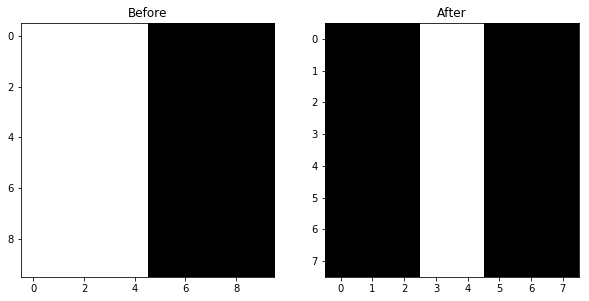

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('Before')
ax.imshow(image, cmap='gray')

ax = fig.add_subplot(1,2,2)
ax.set_title('After')
ax.imshow(result, cmap='gray')
plt.show()

<br>


## 2. Zero Padding 적용하기
---

합성곱 연산을 할때마다 조금씩 이미지의 크기가 줄어듭니다.<br>
이는 크게 2가지 문제를 유발합니다.<br>

1. 깊게 쌓으면 이미지의 크기가 지나치게 작아지게 됨 <br>
2. 가장자리의 정보가 계속 유실되게 됨 <br>

이러한 문제를 해결하기 위해, 가장자리에 이미지를 덧대주는 작업을 거치게 됩니다.<br>

In [0]:
print("Before Feature Map size :",image.shape)
image_with_pad = np.pad(image,[[1,1],[1,1]],mode='constant')
print("After padding size :",image_with_pad.shape)

# sobel Filter를 이용
v_sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) 

# 합성곱 연산 적용
result = #fix me #
for i in range(#fix me#):
    for j in range(#fix me#):
        patch = #fix me#
        value = #fix me#
        result[#fix me#] = value

print("After Feature Map size :",result.shape)

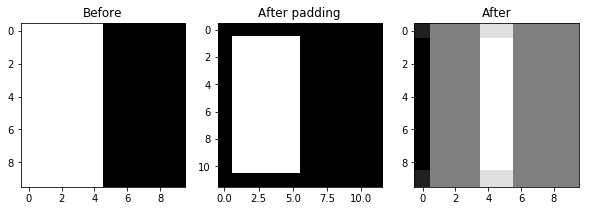

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.set_title('Before')
ax.imshow(image, cmap='gray')

ax = fig.add_subplot(1,3,2)
ax.set_title('After padding')
ax.imshow(image_with_pad, cmap='gray')

ax = fig.add_subplot(1,3,3)
ax.set_title('After')
ax.imshow(result, cmap='gray')
plt.show()

Input과 Output의 크기가 동일합니다.<br>
작은 이미지에서는 패딩에 의해, 결과가 약간씩 왜곡되지만, 실제로 대부분 이미지에서<br>
패딩으로 인한 왜곡 현상은 무시할 수 있을 만큼 작습니다.

<br>

## 3. 패딩의 크기 결정
---
Tensorflow 에서도 Convolution 에 padding 을 쉽게 적용 가능합니다. 

Tensorflow 에서 사용되는 padding 알고리즘은 2가지 방법이 있습니다. 

1. VALID :  패딩을 붙이지 않습니다. Window 에 Kernel 의 사이즈 보다 적은 데이터 셋이 있다면 Convolution 연산을 수행하지 않습니다. 


![Imgur](https://i.imgur.com/uVU6FlS.png)
    
2. SAME : Convoluiton 연산을 수행하기 위해 이미지에 padding 을 붙입니다.  Window 에 Kernel 의 사이즈 보다 적은 데이터 셋이 있다면 padding 을 붙여 Convolution 을 수행합니다.

![Imgur](https://i.imgur.com/gBvXhZw.png)

### (1) SAME 시 패딩의 크기를 결정하기

출력의 크기는 아래와 같이 결정됩니다.<br>
$
n_{out} = n_{in}+2p-k +1\\
-------------\\
n_{in} : \mbox{number of input features}\\
n_{out} : \mbox{number of output features}\\
k : \mbox{convolution kernel size}\\
p : \mbox{convolution padding size}\\
$

출력의 크기와 입력의 크기가 동일하게 만들어주기 위해서는<br>
패딩의 크기가 아래와 같아져야 합니다.<br>
$
p = \frac{k-1}{2}
$

### (2) 필터의 크기

필터의 크기는 홀수 입니다. 그 이유는 두가지로,
1. 패딩이 비대칭이 됩니다. 
   홀수 일 때 합성곱에서 동일한 크기로 패딩을 더해줄 수 있고, 짝수면 왼쪽과 오른쪽을 다르게 패딩해야 하기 때문에 번거롭습니다.
2. 필터의 크기가 홀수가 되어야 중심 픽셀이 잡힙니다. 이러한 개념들은<br>
기존 컴퓨터 비전에서 필터를 설계할 때의 관습입니다.

## 4 tf.nn.conv2d 함수에 padding 적용하기 

`tf.nn.conv2d` 함수에 `SAME`, `VALID` padding 알고리즘을 적용하는 법을 배워보고 결과를 확인합니다. 

In [0]:
import numpy as np
import tensorflow as tf

# sample image
sample = np.ones(shape=[5, 5], dtype=np.float32)
# numpy to tensor
tf_sample = #fix me #
# tensorflow tf.nn.conv2d 에 넣을수 있도록 shape 변경 
tf_sample = #fix me #

# sample kernel 
sample_kernel = np.ones(shape=[3, 3], dtype=np.float32)
# numpy to tensor
tf_kernel = #fix me#
# tensorflow tf.nn.conv2d 에 넣을수 있도록 kernel shape 변경 
tf_kernel = #fix me #

# convolution 수행 

output = tf.nn.conv2d(#fix me#)
output_1 = tf.nn.conv2d(#fix me#)

# 결과 확인 
sess = tf.Session()
output_, output_1_ = sess.run([output, output_1])
print(output_.shape, output_1_.shape)

(1, 5, 5, 1) (1, 3, 3, 1)


<br><br>

# \[ 2. 스트라이드란 \]

----

----

> *stride는 필터의 이동 간격을 뜻합니다.*<br>
> *기존의 필터는 한칸씩 이동했다면, stride가 1보다 클 경우, 그 수 만큼 필터가 이동하게 됩니다.*<br>


## 1. 스트라이드 적용하기
----

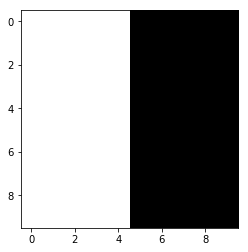

In [0]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10

plt.imshow(image,cmap='gray')
plt.show()

Before Feature Map size : (10, 10)
After Feature Map size : (5, 5)


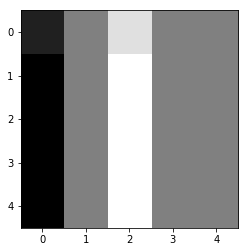

In [0]:
stride = 2

print("Before Feature Map size :",image.shape)
image_with_pad = np.pad(image,[[1,1],[1,1]],mode='constant')

# sobel Filter를 이용
v_sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) 

# 합성곱 연산 적용
result = #fix me# # stride를 적용하면 크기가 반으로 줄어듦

for i in range(#fix me#):
    # stride의 간격으로 값을 가져옴
    for j in range(#fix me#):
        patch = #fix me#
        value = #fix me#
        result[#fix me#] = value

print("After Feature Map size :",result.shape)

plt.imshow(result,cmap='gray')
plt.show()

크기는 줄였지만, 전체적인 형태는 (10,10)일 때와 현재와 동일합니다.<br>
Stride를 거치면, 스트라이드의 제곱수만큼 연산 수가 줄어들게 됩니다.<br>

큰 이미지의 경우 주위 값들의 차이가 큰 영향을 못미칠 경우가 많고,<br>
어느정도 중복이 될수있어서 stride를 주더라도 성능 저하가 크게 발생하진 않습니다.

## 2. 스트라이드가 있었을 때의 출력 특징 맵의 크기
----

스트라이드를 통한 출력 특징 맵의 크기는 아래와 같이 변하게 됩니다.

$
n_{out} = \lfloor \frac{n_{in}+2p-k}{s}\rfloor +1\\
-------------\\\
n_{in} : \mbox{number of input features}\\
n_{out} : \mbox{number of output features}\\
k : \mbox{convolution kernel size}\\
p : \mbox{convolution padding size}\\
s : \mbox{convolution stride size}\\
$


## 3. Same padding일 때의 패딩 크기 결정
----

이때 Same padding인 경우, 출력 특징 맵의 크기는 아래와 같게 됩니다.<br>
$
\lfloor n_{out} \rfloor = \lfloor \frac{n_{in}}{s} \rfloor
$<br>
출력 특징 맵의 크기가 위의 값이 될 수 있도록, padding의 크기를 결정하게 됩니다.<br>
$
\lfloor \frac{n_{in}}{s} \rfloor = \lfloor \frac{n_{in}+2p-k}{s}\rfloor +1\\
$

## 4. tf.nn.conv2d 함수에 padding 적용하기 
----

`tf.nn.conv2d` 에서 strides argument 을 통해 convolution 연산에 strides 에 연산을 적용합니다 
![Imgur](https://i.imgur.com/Av9xwed.png)

strides 는  [batch size , height , width, channel ] 형태로 지정해 주어야 합니다. 
- 양쪽 batch size, channel  은 1로 고정되어 있습니다. -
- heigth = 3 이면 height 방향으로 3칸씩 건너 뛰며 convolution 연산을
수행합니다. 
- width = 2 이면 width 방향으로 2칸씩 건너 뛰며 convolution 연산을 수행합니다 


In [0]:
import numpy as np
import tensorflow as tf

# sample image 
sample = np.ones(shape=[10, 10], dtype=np.float32)
tf_sample = #fix me #

# sample kernel 
sample_kernel = np.ones(shape=[3, 3], dtype=np.float32)
tf_kernel = #fix me#

# convolution 수행 
output = tf.nn.conv2d(#fix me #)

output_1 = tf.nn.conv2d(#fix me#)

# 결과 확인 
sess = tf.Session()
output_, output_1_ = sess.run([output, output_1])
print(output_.shape, output_1_.shape)

(1, 4, 5, 1) (1, 3, 4, 1)


#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/25

---